In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings("ignore")
# preview the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


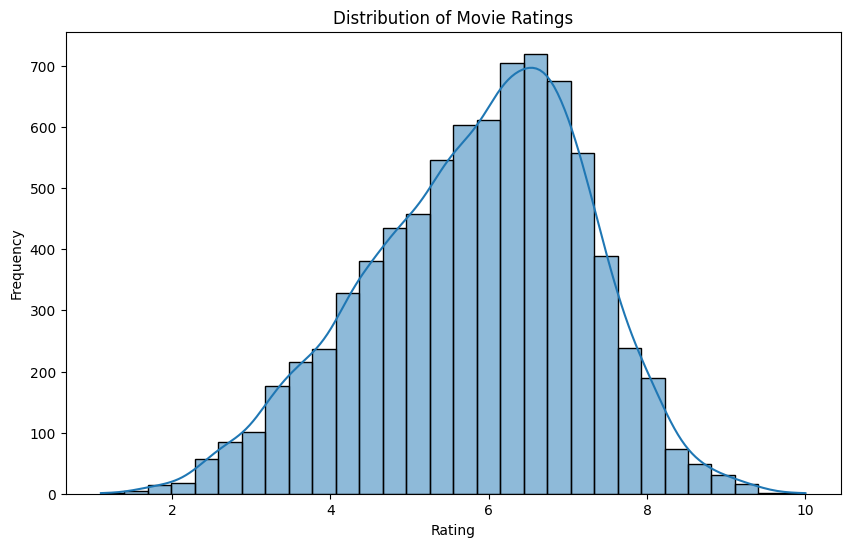

In [ ]:
# rating analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

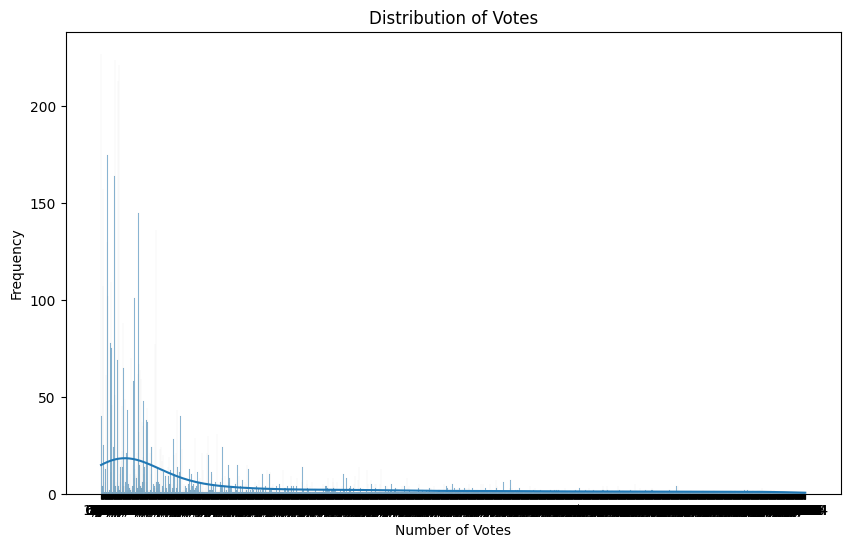

In [ ]:
# Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

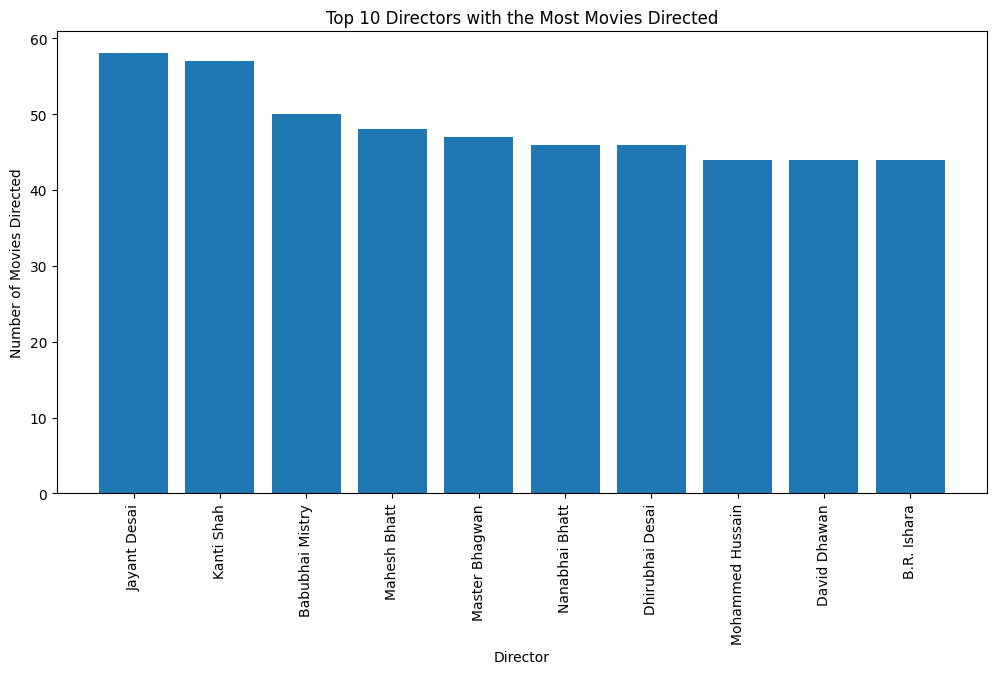

In [ ]:
# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()

# Select the top 10 directors with the most movies directed
top_10_directors = director_counts.head(10)

# Create a bar plot to visualize the top 10 directors with the most movies directed
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values),
plt.title('Top 10 Directors with the Most Movies Directed')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=90)
plt.show()

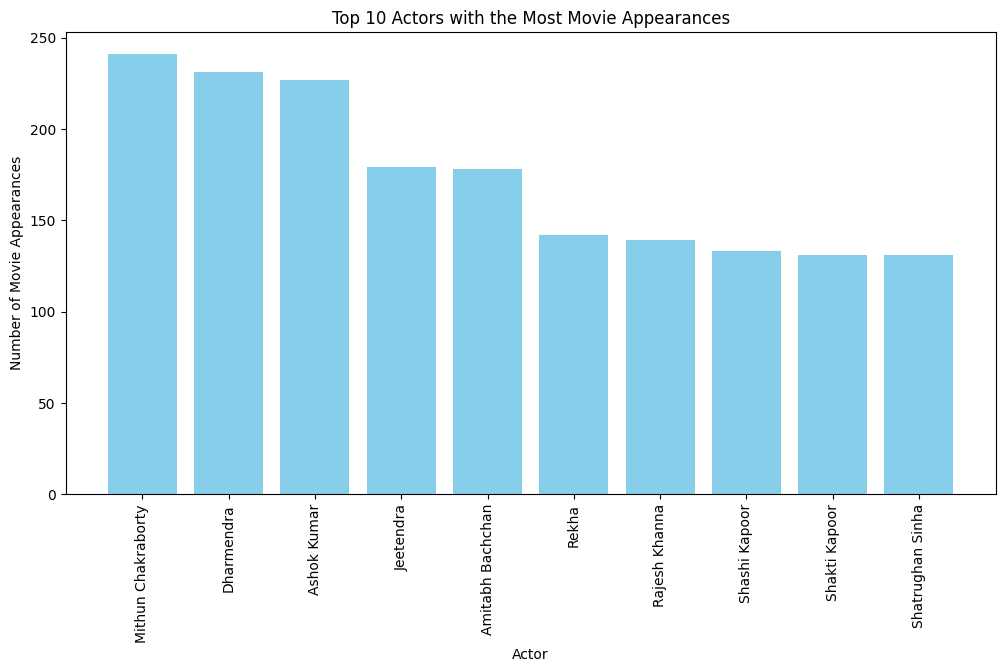

In [ ]:
# Count the number of movies in which each actor starred
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()

# Select the top 10 actors with the most movie appearances
top_10_actors = actor_counts.head(10)

# Create a bar plot to visualize the top 10 actors with the most movie appearances
plt.figure(figsize=(12, 6))
plt.bar(top_10_actors.index, top_10_actors.values,  color='skyblue')
plt.title('Top 10 Actors with the Most Movie Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Movie Appearances')
plt.xticks(rotation=90)
plt.show()

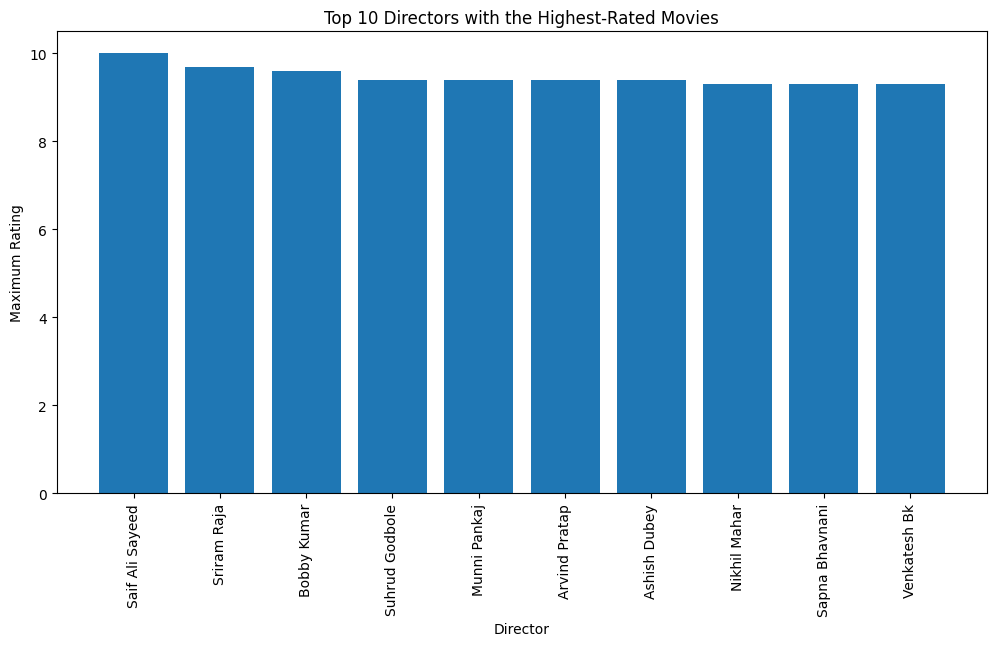

In [ ]:
# Group the data by director and find the maximum rating within each group
directors_max_rating = df.groupby('Director')['Rating'].max()

# Sort the directors by their highest rating in descending order and select the top 10
top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 directors with the highest-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()

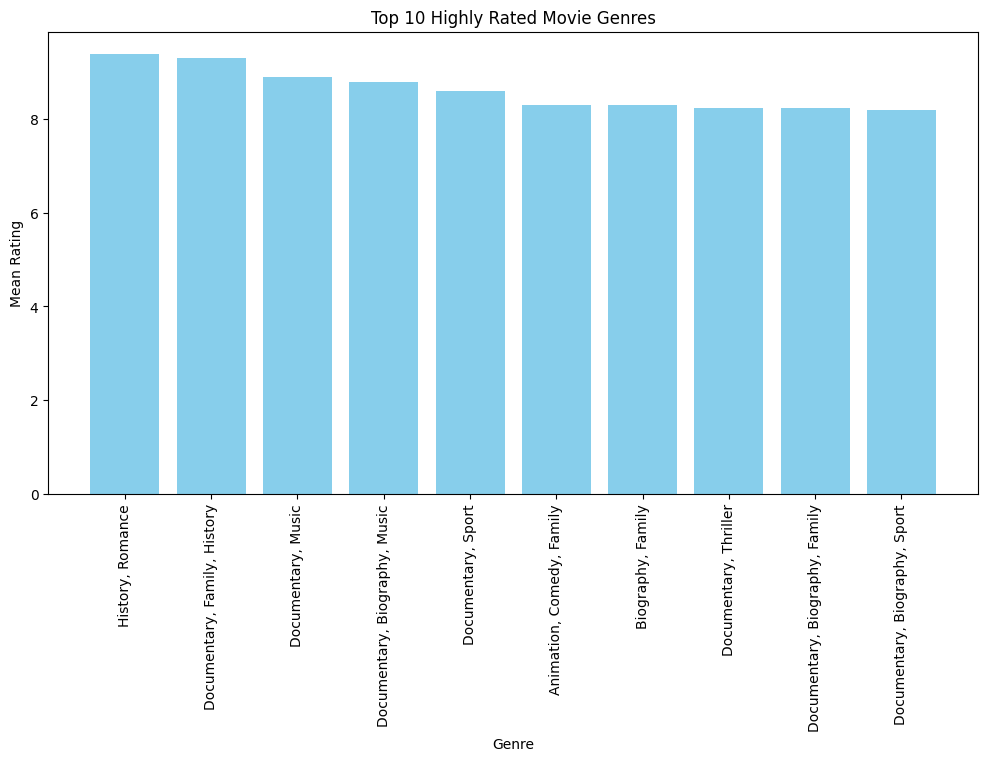

In [ ]:
# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()

# Sort the genres by mean rating in descending order and select the top 10
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 highly rated genres
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

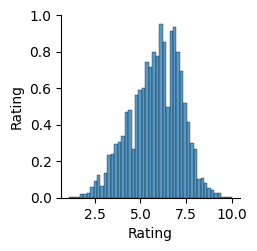

In [ ]:
# Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])

# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()